<a href="https://colab.research.google.com/github/Kur1sutaru/oncogenic-pathways-and-MPS/blob/main/cmap_repositioning_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

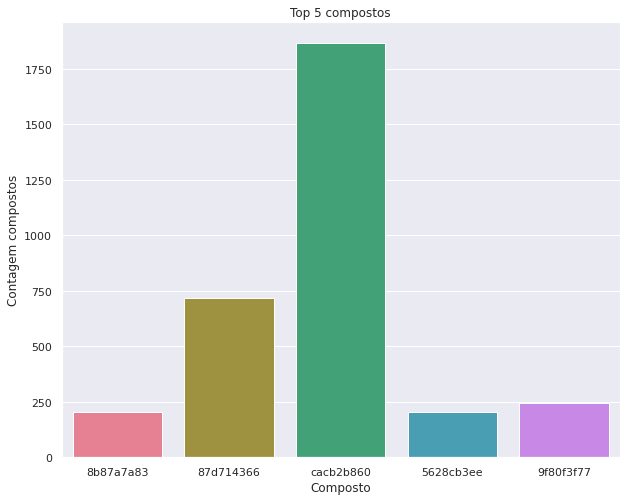

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'), palette='husl')
ax.set_title('Top 5 compostos')
plt.title("Top 5 compostos", fontsize = 12)
plt.xlabel("Composto", fontsize = 12)
plt.ylabel("Contagem compostos", fontsize = 12)
plt.show()

# cores e paletas em https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

Até o momento analisamos os dados de tempo, dose, compostos e afins. Entretanto, não analisamos os dados de expressões gênicas (G's) e viabilidade celular (C's). Será que podemos criar um gráfico de barras para esses dados?
Vamos pensar que a nossa base de dados apresenta mais de 3.000 compostos. Mas quantos desses compostos aparecem na coluna ```g-0```? 
Para responder essa questão, vamos usar a função ```unique()``` do Pandas que conta os valores únicos presentes na coluna em questão. Como resposta padrão, o retorno será uma lista com arrays (os nomes dos compostos) mas, nosso objetivo é saber o tamanho dessa lista e, por isso, usamos o ```len```, pois assim, ele contará o tamanho desta lista de arrays.

In [ ]:
len(dados['g-0'].unique())

14367

Como temos diversos compostos únicos dentro da coluna ```g-0```, não é viável que façamos o mesmo gráfico utilizado anteriormente. 
Por isso, precisamos traçar uma nova estratégia para visualizar os nossos dadose aqui, usaremos um histograma.
O primeiro passo, é identificar qual o valor mínimo (```min()```) e o valor máximo (```max()```) para entender qual o intervalo númerico com o qual estamos trabalhando.

In [ ]:
dados['g-0'].min()

-5.513

In [ ]:
dados['g-0'].max()

10.0

Depois que reconhecemos que o nosso intervalo vai de ~5,5 a 10,0, podemos partir para o histograma e a função que usaremos para plotar é do Pandas (```dataframe['variável'].hist()```).
Assim que rodamos essa função, percebemos que a visualização destes dados ainda não está boa pois, a divisão padrão das barras do histograma, representam intervalos muito grandes que atrapalham o entendimento dos dados.
Por isso, acresentamos um parâmetro dentro da função ```(bins = número de quebras)``` para melhor dividir e, consequentemente visualizar os dados.
Quando definimos os bins em 100, podemos perceber que a forma se aproxima bastante de uma curva bastante conhecida: a curva normal.

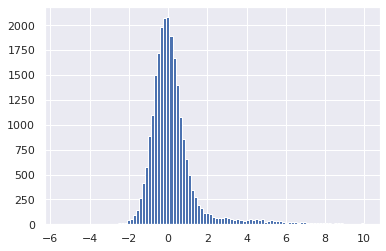

In [ ]:
dados['g-0'].hist(bins = 100)

Aqui, estamos testando o mesmo histograma para outro gene, o ```g-19```. E queremos fazer uma comparação entre os gráficos e podemos fazer algumas considerações sobre ambos os gráficos.
Percebemos, por exemplo, que a imagem seguem a mesma tendência de curva mas há um deslocamento para a direita.

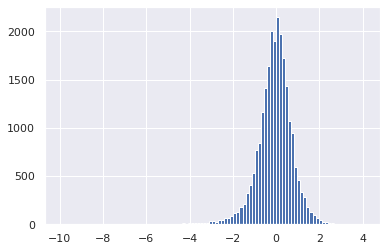

In [ ]:
dados['g-19'].hist(bins = 100)

Como concluimos que plotar os gráficos de todos os genes é inviável, vamos analisar resumidamente algumas estatísticas sobre eles. 
Para isso, vamos usar a função ```describe``` do Pandas que já calcula e descreve algumas estatísticas importantes para o entendimento dos dados (contagem, média, desvio padrão, mínimo, alguns quartis e máximo).


In [ ]:
dados.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.4

Neste ponto, vamos separar as variáveis que queremos analisar da base de dados (exemplo: ```g-0``` e ```g-1```) através de uma lista de arrays.
Entretanto, apesar desta ser uma ótima estratégia para a separação, temos 771 genes e escrevê-los um a um seria muito trabalhoso e podemos fazer de uma outra forma.

In [ ]:
dados[['g-0', 'g-1']]

,g-0,g-1
0,1.0620,0.5577
1,0.0743,0.4087
2,0.6280,0.5817
3,-0.5138,-0.2491
4,-0.3254,-0.4009
...,...,...
23809,0.1394,-0.0636
23810,-1.3260,0.3478
23811,0.3942,0.3756
23812,0.6660,0.2324


Uma estratégia mais direta em que não precisaremos escrever a lista gene a gene, é o uso da função ```loc[]``` do Pandas.
Como argumentos, passamos primeiramente o ```:```, os dois pontos faz com que o ```loc[]```retorne todos os elementos de uma determinada coluna, isso é importante quando não sabemos qual a quantidade de linhas de um dataframe. E, o segundo elemento, passamos as colunas que são de nosso interesse. No caso, queremos que a função nos retorne todos os elementos das colunas ```g-0```até ```g-771```.
E, por fim, podemos declarar a nossa função de interesse a partir deste filtro realizado nos dados, o ```describe()```.

In [ ]:
dados.loc[0:,'g-0':'g-771'].describe()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950

Apesar do describe reunir as nossas estatísticas de interesse, é bastante complexo analisar o dataframe resposta. Para facilitar o nosso entendimento, vamos plotar histogramas que nos ajudaram na visualização das estatísticas de todas as colunas selecionadas.
Olhando o dataframe original, anteriormente, fizemos o histograma de apenas uma coluna. Mas agora, nosso conjunto de dados de interesse é o ```describe()``` que fizemos a partir do ```loc[]``` e, deste ponto de vista, não queremos mais fazer o histograma coluna a coluna (genes), queremos que ele seja a partir das linhas (estatísticas). Por isso, vamos transpor as linhas e colunas (transformar as linhas em colunas e vice-versa).
Para isso, vamos usar o ```.T[]``` no código anterior que produzimos para organizar o ```describe()```.
Ou seja, vamos manter todo o código até o ```describe()``` e, ao final, acrescentaremos o ```.T[]```. Mas, ao rodarmos essa linha, percebemos que temos como devolutiva o mesmo dataframe mas transposto. E, como aqui, nosso interesse é produzir histogramas, acrescentamos como argumento do ```.T[]``` a estatística alvo (```.T['estatística']```) e, por último, acrescentamos o ```.hist(bins = número de quebras)``` para que o histograma seja observado.



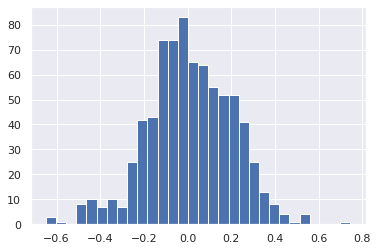

In [ ]:
dados.loc[:,'g-0':'g-771'].describe().T['mean'].hist(bins=30)

A seguir, reproduzimos o código acima apenas alterando o parâmetro estatístico a ser analisado (mínimo e máximo, por exemplo). 
E assim, podemos perceber as nuances de cada métrica.

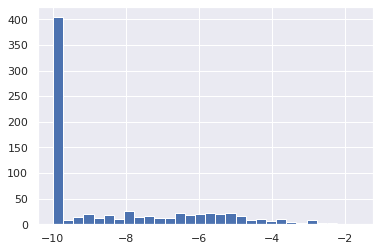

In [ ]:
dados.loc[:,'g-0':'g-771'].describe().T['min'].hist(bins=30)

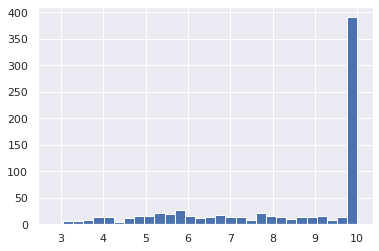

In [ ]:
dados.loc[:,'g-0':'g-771'].describe().T['max'].hist(bins=30)

É muito interessante que a gente replique a análise desenvolvida para os ```genes (g)```, nos ```tipos celulares (c)```. 
Por isso, vamos copiar a linha de código que produz os histogramas mas aqui, vamos modificar o argumento ```loc[:,'g-0':'g-771'] -> loc[:,'c-0':'c-99']``` e a quantidade de bins ```hist(bins=100) -> hist(bins=50)```.

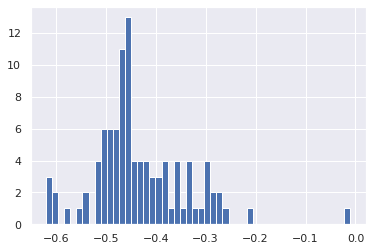

In [ ]:
dados.loc[:,'c-0':'c-99'].describe().T['mean'].hist(bins=50)

Um outro tipo de gráfico super interessante e útil é o boxplot. 
Para visualizá-lo, vamos usar a função ```boxplot```do Seaborn e, como argumentos dessa função vamos passar um ```x```, onde ```x = coluna que será plotada neste eixo``` e a base de dados ```data = conjunto de dados```.
O boxplot apresenta uma caixa no meio onde podemos identificar a mediana (linha no meio da caixa que é o ponto onde metade dos dados estão na direita e a outra metade para a esquerda), os outliers (pontos acima ou abaixo do eixo principal do gráfico que representam valores discrepantes para mais ou para menos), a maior concentração dos dados (caixa principal que representa onde está a mior parte dos dados - primeiro quartil (25%) e terceiro quartil (75%)) e os máximos e mínimos desconsiderando os outliers (linhas laterais à caixa principal).
O boxplot é uma importante ferramenta na visualização de dados porque em apenas um gráfico, podemos identificar várias métricas estatísticas.

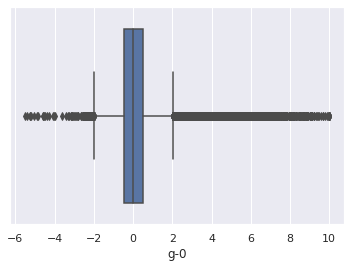

In [ ]:
sns.boxplot(x='g-0' , data=dados)

Podemos também, além de definir apenas os dados que irão no eixo x, definimos os dados para o outro eixo, atribuindo um valor para o parâmetro ```y``` (```y = variável que vai ser plotada neste eixo```).
Como podemos perceber, no boxplot que representa o ```tratamento = com_droga``` apresenta muitos outliers e isso gera uma discussão bastante interessante pois, do ponto de vista biológico a investigação desses pontos é importante mas, dependendo da área que estamos trabalhando, esse ponto pode apresentar outras soluções. 
Dito isso, é importante para um cientista de dados não só entender e manipular a base de dados mas também saber acerca do negócio que estamos tratando.

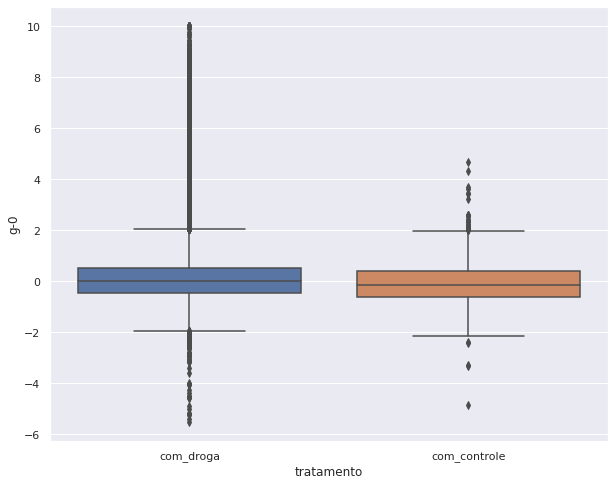

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g-0', x='tratamento' , data=dados)

#Desafios




##Aula2

###Desafio 01: Ordenar o gráfico countplot

###Desafio 02: Melhorar a visualização alterando tamanho da fonte...

###Desafio 03: Plotar os histogramas com seaborn

###Desafio 04: Estudar sobre as estatíticas retornadas no .describe()

###Desafio 05: Refletir sobre a manipulação do tamanho das visualizações. 

###Desafio 06: Fazer outras análises com o boxplot e até com o histograma. 

###Desafio 07: Resumo do que você aprendeu com os dados

###Desafio 01: Ordenar o gráfico countplot


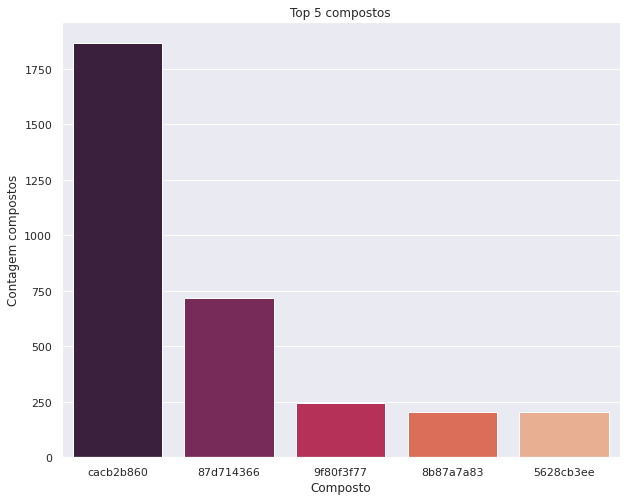

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'), order= dados['composto'].value_counts().index[0:5], palette='rocket')
ax.set_title('Top 5 compostos')
plt.title("Top 5 compostos", fontsize = 12)
plt.xlabel("Composto", fontsize = 12)
plt.ylabel("Contagem compostos", fontsize = 12)
plt.show()

###Desafio 02: Melhorar a visualização alterando tamanho da fonte

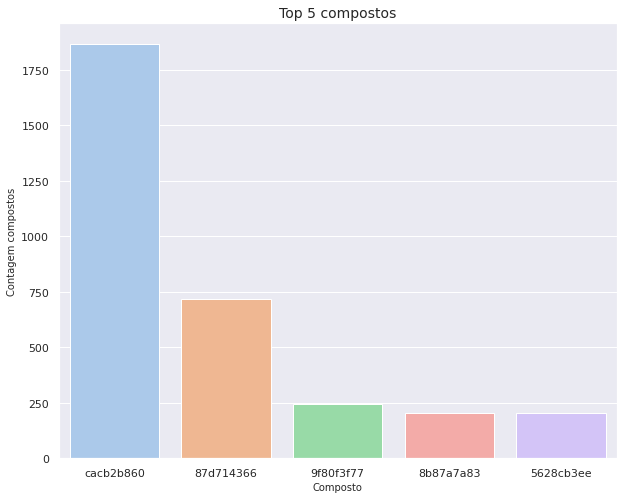

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'), order= dados['composto'].value_counts().index[0:5], palette='pastel')
ax.set_title('Top 5 compostos')
plt.title("Top 5 compostos", fontsize = 14)
plt.xlabel("Composto", fontsize = 10)
plt.ylabel("Contagem compostos", fontsize = 10)
plt.show()

In [ ]:
## escolher paletas de cores https://seaborn.pydata.org/tutorial/color_palettes.html

###Desafio 03: Plotar os histogramas com seaborn


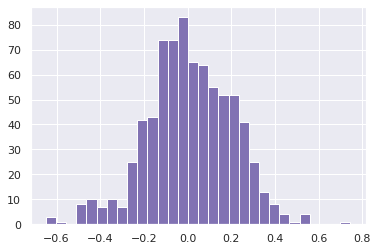

In [ ]:
dados.loc[:, 'g-0':'g-771'].describe().T['mean'].hist(bins= 30, color={'m'})

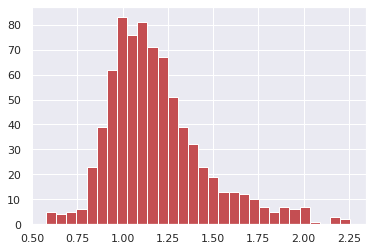

In [ ]:
dados.loc[:, 'g-0':'g-771'].describe().T['std'].hist(bins= 30, color={'r'})

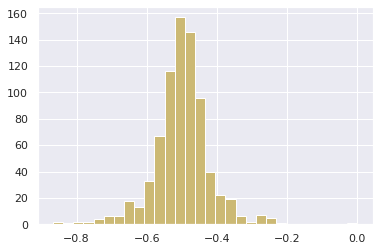

In [ ]:
dados.loc[:, 'g-0':'g-771'].describe().T['25%'].hist(bins= 30, color={'y'})

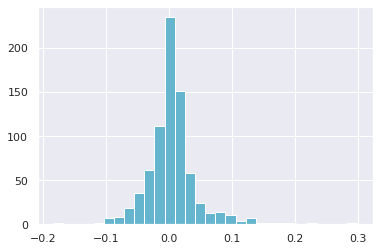

In [ ]:
dados.loc[:, 'g-0':'g-771'].describe().T['50%'].hist(bins= 30, color={'c'})

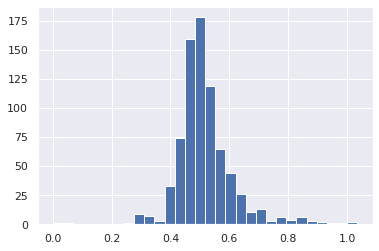

In [ ]:
dados.loc[:, 'g-0':'g-771'].describe().T['75%'].hist(bins= 30)

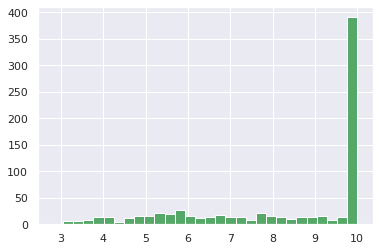

In [ ]:
dados.loc[:, 'g-0':'g-771'].describe().T['max'].hist(bins= 30, color={'g'})

## Para não esquecer as cores, **one of the characters {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}, which are short-hand notations for shades of blue, green, red, cyan, magenta, yellow, black, and white.**

###Desafio 04: Estudar sobre as estatíticas retornadas no .describe()
- mean - média
- std - desvio padrão
- 25% primeiro quartil
- 50% - mediana
- 75% terceiro quartil
São as chamadas **Medidas de Tendência Central e Dispersão** <http://www.lampada.uerj.br/arquivosdb/_book/medidasTendenciaDispersao.html>
- Média
Neste exemplo, a média dá uma boa ideia da tendência central dos dados, mas em outras situações ela pode ser enganosa
- Desvio padrão
O desvio padrão (s) é calculado, extraindo-se a raiz quadrada da variância s2, e é medido na mesma unidade dos valores ao qual ele se refere.
O desvio padrão e a variância consideram todos os valores da variável para o seu cálculo, e são bastante utilizados na análise estatística.
- Percentis
Os percentis são quantis utilizados com bastante frequência. O percentil 10, indicado por P10, designa o valor para o qual 10% dos valores da variável estão abaixo dele, e assim por diante.

O quartil inferior (Q1) é, portanto, igual ao P25; a mediana é igual ao P50, e o quartil superior (Q3) é igual ao P75. Um algoritmo semelhante ao utilizado para o cálculo do quartil pode ser utilizado para os percentis.


###Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.

- O tamanho da visualização é importante para ter mais atenção às nuances dos resultados dos nossos dados. Gráficos pequenos podem mascarar diferenças não muito sutis nos dados.

##
Desafio 06: Fazer outras análises com o boxplot e até com o histograma.

In [ ]:
dados.loc[:, 'c-0':'c-99'].describe().T

,count,mean,std,min,25%,50%,75%,max
c-0,23814.0,-0.355156,1.752565,-10.0,-0.549300,-0.00900,0.448975,3.365
c-1,23814.0,-0.455359,2.004962,-10.0,-0.538425,0.00980,0.476875,3.915
c-2,23814.0,-0.480542,2.039346,-10.0,-0.550375,-0.00400,0.460575,2.970
c-3,23814.0,-0.377666,1.554583,-10.0,-0.601975,-0.03905,0.413100,2.408
c-4,23814.0,-0.493552,2.091888,-10.0,-0.559975,0.01140,0.470300,4.555
...,...,...,...,...,...,...,...,...
c-95,23814.0,-0.353726,1.629291,-10.0,-0.567975,-0.01025,0.444750,2.814
c-96,23814.0,-0.463485,2.059725,-10.0,-0.552575,-0.00125,0.465225,3.505
c-97,23814.0,-0.378241,1.703615,-10.0,-0.561000,-0.00680,0.446400,2.924
c-98,23814.0,-0.470252,1.834828,-10.0,-0.592600,0.01400,0.461275,3.111


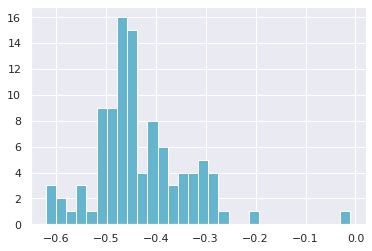

In [ ]:
dados.loc[:, 'c-0':'c-99'].describe().T['mean'].hist(bins = 30, color={'c'})

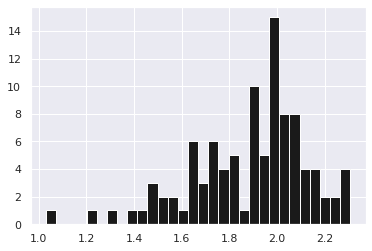

In [ ]:
dados.loc[:, 'c-0':'c-99'].describe().T['std'].hist(bins = 30, color={'k'})

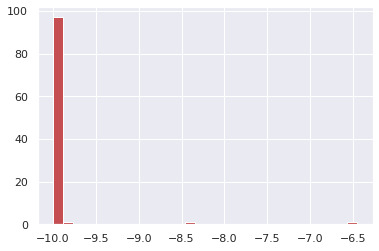

In [ ]:
dados.loc[:, 'c-0':'c-99'].describe().T['min'].hist(bins = 30, color={'r'})

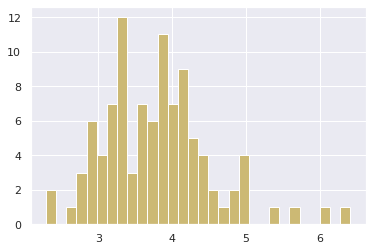

In [ ]:
dados.loc[:, 'c-0':'c-99'].describe().T['max'].hist(bins = 30, color={'y'})

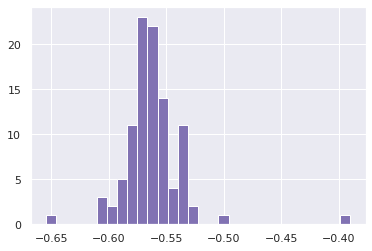

In [ ]:
dados.loc[:, 'c-0':'c-99'].describe().T['25%'].hist(bins = 30, color={'m'})

## Agora vou tentar fazer essas análises com a minha base de dados do cmap

In [21]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving cmap-results-filtered.csv to cmap-results-filtered.csv


In [29]:
datacmap = pd.read_csv('cmap-results-filtered.csv') 
print(data)

             Name  ...     Phase
0       alacepril  ...  Launched
1      benazepril  ...  Launched
2       captopril  ...  Launched
3      cilazapril  ...  Launched
4        delapril  ...  Launched
..            ...  ...       ...
106     tipiracil  ...  Launched
107   thalidomide  ...  Launched
108    metirosine  ...  Launched
109  fruquintinib  ...  Launched
110     tivozanib  ...  Launched

[111 rows x 4 columns]


In [23]:
pd.read_table('cmap-results-filtered.csv')

,"Name,MOA,Genes,Phase"
0,"alacepril,angiotensin converting enzyme inhibi..."
1,"benazepril,angiotensin converting enzyme inhib..."
2,"captopril,angiotensin converting enzyme inhibi..."
3,"cilazapril,angiotensin converting enzyme inhib..."
4,"delapril,angiotensin converting enzyme inhibit..."
...,...
106,"tipiracil,thymidine phosphorylase inhibitor,,L..."
107,"thalidomide,tumor necrosis factor production i..."
108,"metirosine,tyrosine hydroxylase inhibitor,TH,L..."
109,"fruquintinib,VEGFR inhibitor,KDR,Launched"


In [30]:
import pandas as pd
datacmap

,Name,MOA,Genes,Phase
0,alacepril,angiotensin converting enzyme inhibitor,ACE,Launched
1,benazepril,angiotensin converting enzyme inhibitor,ACE,Launched
2,captopril,angiotensin converting enzyme inhibitor,"ACE, LTA4H, MMP2, MMP9",Launched
3,cilazapril,angiotensin converting enzyme inhibitor,ACE,Launched
4,delapril,angiotensin converting enzyme inhibitor,ACE,Launched
...,...,...,...,...
106,tipiracil,thymidine phosphorylase inhibitor,NaN,Launched
107,thalidomide,tumor necrosis factor production inhibitor,TNF,Launched
108,metirosine,tyrosine hydroxylase inhibitor,TH,Launched
109,fruquintinib,VEGFR inhibitor,KDR,Launched


In [34]:
data.head()

,Name,MOA,Genes,Phase
0,alacepril,angiotensin converting enzyme inhibitor,ACE,Launched
1,benazepril,angiotensin converting enzyme inhibitor,ACE,Launched
2,captopril,angiotensin converting enzyme inhibitor,"ACE, LTA4H, MMP2, MMP9",Launched
3,cilazapril,angiotensin converting enzyme inhibitor,ACE,Launched
4,delapril,angiotensin converting enzyme inhibitor,ACE,Launched


In [36]:
data.shape

(111, 4)

In [38]:
data['Name']

0         alacepril
1        benazepril
2         captopril
3        cilazapril
4          delapril
           ...     
106       tipiracil
107     thalidomide
108      metirosine
109    fruquintinib
110       tivozanib
Name: Name, Length: 111, dtype: object

## Retorna a lista de drogas

In [39]:
data['Name'].unique()

array(['alacepril', 'benazepril', 'captopril', 'cilazapril', 'delapril',
       'deserpidine', 'enalapril', 'enalaprilat', 'fosinopril',
       'fosinoprilat', 'imidapril', 'lisinopril', 'moexipril',
       'perindopril', 'quinapril', 'quinaprilat', 'ramipril',
       'temocapril', 'trandolapril', 'zofenopril-calcium', 'azilsartan',
       'azilsartan-medoxomil', 'candesartan', 'candesartan-cilexetil',
       'eprosartan', 'fimasartan', 'irbesartan', 'LCZ696', 'losartan',
       'olmesartan', 'olmesartan-medoxomil', 'telmisartan', 'valsartan',
       'morniflumate', 'tinoridine', 'vedaprofen',
       'methylprednisolone-aceponate', 'imatinib', 'baicalin',
       'olmutinib', 'cinacalcet', 'amlodipine', 'azelnidipine',
       'barnidipine', 'benidipine', 'bepridil', 'cilnidipine',
       'cinnarazine', 'cleviprex', 'cyclandelate', 'dantrolene',
       'diltiazem', 'efonidipine', 'ethaverine', 'felodipine',
       'flunarizine', 'gabapentin', 'isradipine', 'lacidipine',
       'lercanidi

## Retorna a lista de vias

In [40]:
data['MOA'].unique()

array(['angiotensin converting enzyme inhibitor',
       'angiotensin receptor antagonist', 'anti-inflammatory agent',
       'anti-inflammatory agent, glucocorticoid receptor agonist',
       'Bcr-Abl kinase inhibitor, KIT inhibitor, PDGFR tyrosine kinase receptor inhibitor',
       'beta glucuronidase inhibitor',
       "Bruton's tyrosine kinase (BTK) inhibitor, EGFR inhibitor",
       'calcium channel activator', 'calcium channel blocker',
       'calcium channel modulator', 'calcium sensitizer',
       'calcium sensitizer, phosphodiesterase inhibitor',
       'EGFR inhibitor',
       'EGFR inhibitor, RET tyrosine kinase inhibitor, VEGFR inhibitor',
       'estrogen receptor agonist', 'estrogen receptor antagonist',
       'estrogen receptor antagonist, progesterone receptor agonist',
       'estrogen receptor antagonist, selective estrogen receptor modulator (SERM)',
       'FGFR inhibitor, KIT inhibitor, PDGFR tyrosine kinase receptor inhibitor, RAF inhibitor, RET tyrosine kinase 

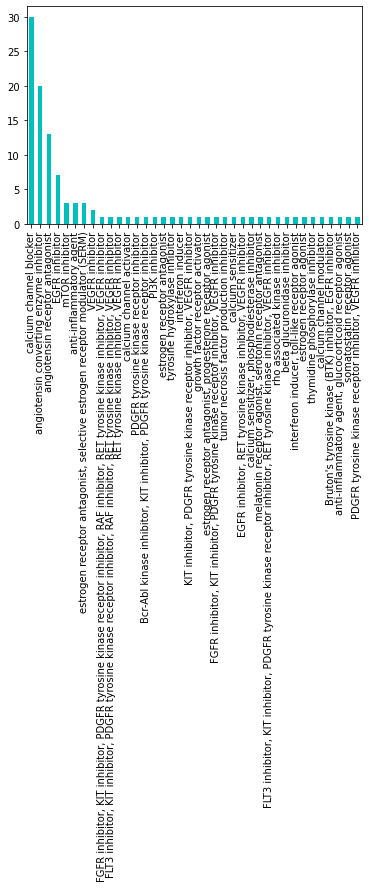

In [53]:
data['MOA'].value_counts().plot.bar(color={'c'})

## Tentando filtrar pela via

In [68]:
data.loc[data['MOA'] == 'calcium channel blocker']

,Name,MOA,Genes,Phase
41,amlodipine,calcium channel blocker,"CACNA1C, CACNA1D, CACNA1F, CACNA1S, CACNA2D1",Launched
42,azelnidipine,calcium channel blocker,CACNA1C,Launched
43,barnidipine,calcium channel blocker,NaN,Launched
44,benidipine,calcium channel blocker,"CACNA1C, CACNA1G",Launched
45,bepridil,calcium channel blocker,KCNQ4,Launched
46,cilnidipine,calcium channel blocker,CACNA1B,Launched
47,cinnarazine,calcium channel blocker,NaN,Launched
48,cleviprex,calcium channel blocker,"CACNA1C, CACNA1D, CACNA1F, CACNA1S",Launched
49,cyclandelate,calcium channel blocker,NaN,Launched
50,dantrolene,calcium channel blocker,"RYR1, RYR3",Launched


# Top 5 vias que mais aparecem relacionadas aos compostos/drogas

In [75]:
cod_vias = data['MOA'].value_counts().index[0:5]
cod_vias

Index(['calcium channel blocker', 'angiotensin converting enzyme inhibitor',
       'angiotensin receptor antagonist', 'EGFR inhibitor', 'mTOR inhibitor'],
      dtype='object')

Top compostos 

In [97]:
cod_compostos = data['Name'].value_counts().index[0:10]
cod_compostos

Index(['axitinib', 'temsirolimus', 'amlodipine', 'nilvadipine', 'lidoflazine',
       'nicardipine', 'olmesartan-medoxomil', 'moexipril', 'osimertinib',
       'neratinib'],
      dtype='object')

In [98]:
data.query('Name in @cod_compostos')

,Name,MOA,Genes,Phase
12,moexipril,angiotensin converting enzyme inhibitor,"ACE, ACE2",Launched
30,olmesartan-medoxomil,angiotensin receptor antagonist,AGTR1,Launched
41,amlodipine,calcium channel blocker,"CACNA1C, CACNA1D, CACNA1F, CACNA1S, CACNA2D1",Launched
62,lidoflazine,calcium channel blocker,"SCN1A, SCN3A, SLC29A1",Launched
65,nicardipine,calcium channel blocker,ADORA3,Launched
67,nilvadipine,calcium channel blocker,"CACNA1C, CACNA1D",Launched
79,neratinib,EGFR inhibitor,"EGFR, ERBB2, KDR",Launched
80,osimertinib,EGFR inhibitor,EGFR,Launched
98,temsirolimus,mTOR inhibitor,MTOR,Launched
101,axitinib,"PDGFR tyrosine kinase receptor inhibitor, VEGF...","CSF1, FLT1, FLT4, KDR, PLK4",Launched


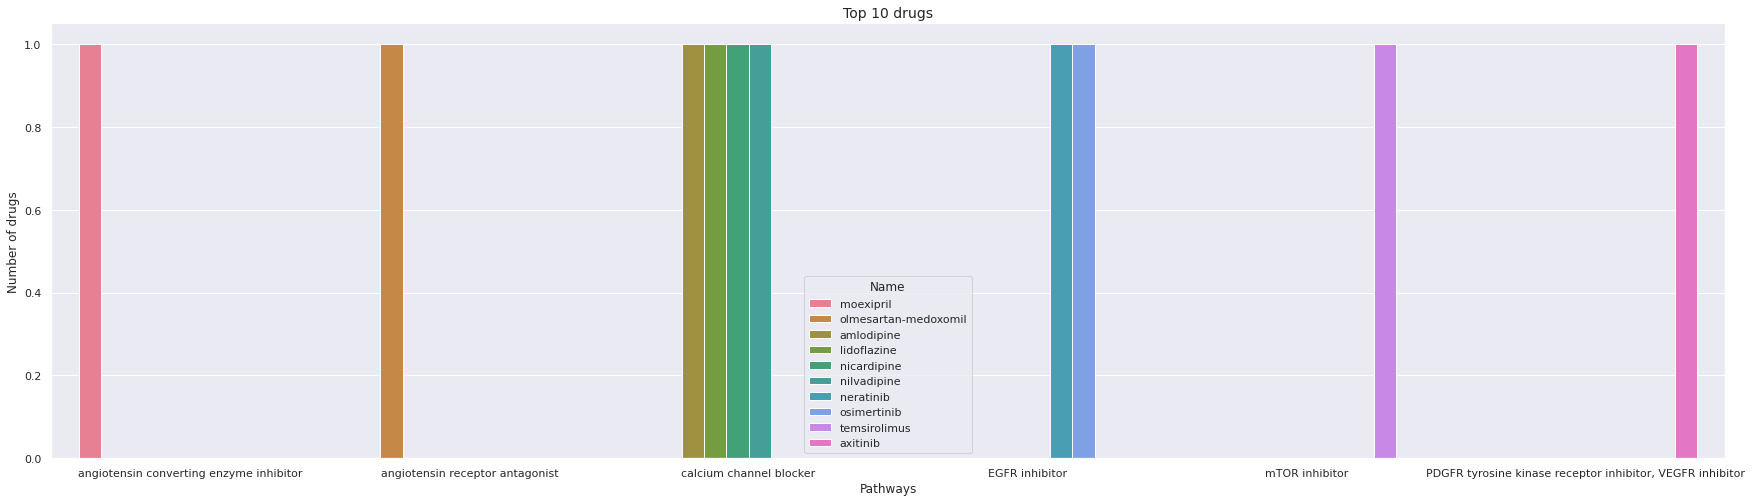

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(30, 8))
ax = sns.countplot(x = 'MOA', data=data.query('Name in @cod_compostos'), palette='husl', hue='Name')
ax.set_title('Top 10 compostos')
plt.title("Top 10 drugs", fontsize = 14)
plt.xlabel("Pathways", fontsize = 12)
plt.ylabel("Number of drugs", fontsize = 12)
plt.show()

# cores e paletas em https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette